In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn import tree

In [3]:
df = pd.read_csv('datasets/data.csv')

In [4]:
pd.set_option('display.max_columns', None)
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

First, I copied our lesson notes on Decision Tree Classifier exactly. 

DecisionTreeClassifier: accuracy = 0.964


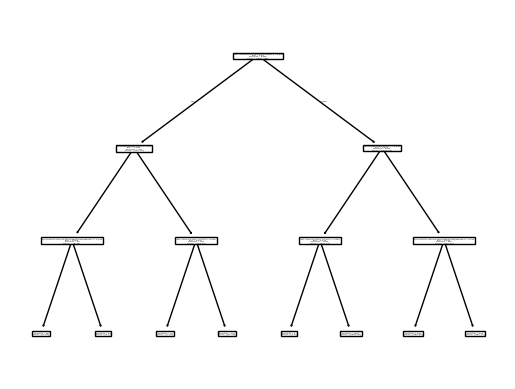

In [14]:
#First, we split the data
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)
depth = 3

#dividing data into 80% for training model and 20% for evaluating model performance
#random_state parameter is a way to control randomness in certain ml processes so that results can be produced consistently; here, since the train_test_split() function randomly divides data into testing and training, the random_state parameter fixes randomness so that the split is always the same even when code is run multiple times. 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#initialise the decision tree classifier
#max_depth of tree is not too big to prevent overfitting
#random_state parameter here, ensures decision tree makes the same splits in same order every time u train it given the same data. 
sk_model = DecisionTreeClassifier(max_depth=depth, random_state=1)
sk_model.fit(x_train, y_train) #train the model

sk_pred = sk_model.predict(x_test) #predicts target variable for test dataset

acc = (y_test == sk_pred).mean() #now we find accuracy by comparing the predicted label and actual label -- so result will be the proportion of correctly predicted samples out of total test samples.
print('DecisionTreeClassifier: accuracy = {:.3f}'.format(acc))


#visualising decision tree
feature_names = x.columns.tolist()
tree.plot_tree(sk_model, feature_names=feature_names) #draws out decision tree structure with splitting criteria(how model splits data at each node), leaf nodes(fiinal predictions), feature importance (features used in decision-making)
plt.show()


#without random_state in both instances, 1) the train-test splits will change making model evaluations inconsistent and 2) decision tree splits will change altering the tree structure and potentially accuracy.


Clearly the decision tree is way too complex, that we can't even see anything. So I start trying to do feature selection. 

Depth = 1, train_acc = 0.9702, eval_acc = 0.9619
Depth = 2, train_acc = 0.9702, eval_acc = 0.9619
Depth = 3, train_acc = 0.9742, eval_acc = 0.9619
Depth = 4, train_acc = 0.9786, eval_acc = 0.9599
Depth = 5, train_acc = 0.9826, eval_acc = 0.9619
Depth = 6, train_acc = 0.9872, eval_acc = 0.9619
Depth = 7, train_acc = 0.9914, eval_acc = 0.9638
Depth = 8, train_acc = 0.9937, eval_acc = 0.9580


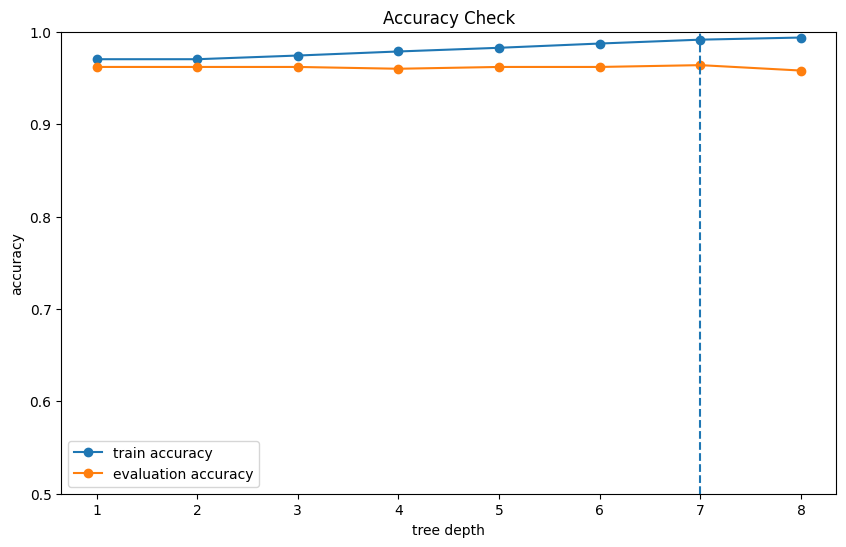

<Figure size 2000x1000 with 0 Axes>

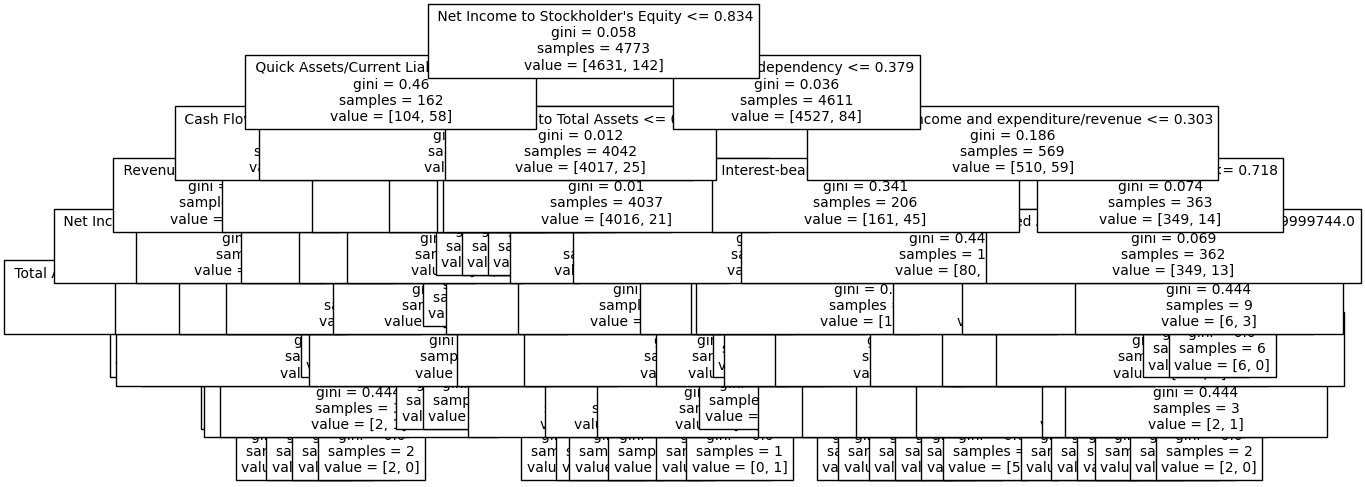

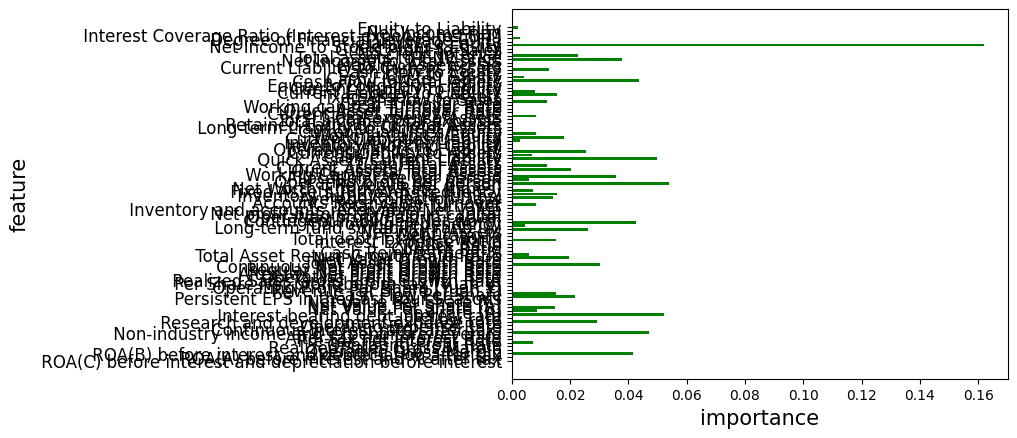

feature importance = [0.    0.    0.042 0.    0.    0.007 0.    0.    0.047 0.    0.    0.029
 0.    0.052 0.009 0.015 0.    0.    0.022 0.015 0.    0.    0.    0.
 0.    0.    0.    0.03  0.    0.02  0.006 0.    0.    0.    0.015 0.
 0.    0.026 0.004 0.043 0.    0.    0.    0.    0.008 0.    0.014 0.015
 0.007 0.    0.054 0.006 0.036 0.    0.02  0.012 0.    0.05  0.007 0.025
 0.    0.    0.003 0.018 0.008 0.    0.    0.    0.    0.008 0.    0.
 0.    0.012 0.    0.016 0.008 0.    0.    0.044 0.004 0.    0.013 0.
 0.    0.038 0.023 0.    0.    0.162 0.    0.003 0.    0.    0.002]


In [15]:
#ridiculously complex decision tree so we do feature selection
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

#we know that training is 70%, validation set is 15%, and test set is also 15%
#don't understand the specific for this
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_test, x_eval, y_test, y_eval = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

#training decision trees of various diff depths
train_acc = []
eval_acc = []
max_depth = 8
for d in range(1, max_depth+1):
        model = DecisionTreeClassifier(max_depth=d)
        model.fit(x_train, y_train)

        y_pred = model.predict(x_train)
        train_acc.append((y_pred == y_train).mean()) #model's performance on training date

        y_pred = model.predict(x_eval)
        eval_acc.append((y_pred == y_eval).mean()) #model's performance on unseen evaluation data; Note if validation accuracy drops as depth increases, model is overfitting

        print('Depth = {}, train_acc = {:.4f}, eval_acc = {:.4f}'\
          .format(d, train_acc[-1], eval_acc[-1]))


#now we find the optimal depth with highest accuracy of validation data. 
opt_depth = np.argmax(eval_acc) + 1

#visualising accuracy changes when we change depth --> checking for overfitting
plt.figure(figsize=(10, 6))
plt.plot(train_acc, marker='o', label='train accuracy')
plt.plot(eval_acc, marker='o', label='evaluation accuracy')
plt.legend()
plt.title('Accuracy Check')
plt.xlabel('tree depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(max_depth), np.arange(1, max_depth+1))
plt.axvline(x=opt_depth-1, ls='--')
plt.ylim(0.5, 1.0)
plt.show()



# Visualize the tree
plt.figure(figsize=(20,10))
feat_names = x.columns.tolist()
plt.figure(figsize=(14,6))
tree.plot_tree(model, feature_names = feat_names, fontsize=10)
plt.show()

# Analyze the importance of features.higher score means more impt features
feature_importance = model.feature_importances_
n_feature = x_train.shape[1]
idx = np.arange(n_feature)

#bar chart for feature importance
plt.barh(idx, feature_importance, align='center', color='green')
plt.yticks(idx, feat_names, size=12)
plt.xlabel('importance', size=15)
plt.ylabel('feature', size=15)
plt.show()

print('feature importance = {}'.format(feature_importance.round(3)))

Things got very confusing right around now. So I gave up and went back to read the data.

In [16]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.0068

Via datawrangler, I noticed a significant no. of outliers for most columns. Since this is financial data, I decided to check for long-tailed distribution aka when tail extends further than normal distribution.

In [ ]:
%pip install imbalanced-learn
%pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
import xgboost as xgb
from sklearn.metrics import recall_score


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline
from sklearn.metrics import average_precision_score, precision_recall_curve

In [18]:
# Calculate skewness and kurtosis for each feature
skewness = df.skew()
kurtosis_values = df.apply(kurtosis)

# Print skewness and kurtosis summary
summary = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis_values})
print(summary)

# Filter for skewed features (consider skewness > 1 or < -1 as skewed)
skewed_features = summary[summary['Skewness'].abs() > 1]
print("Skewed Features:")
print(skewed_features)

                                                     Skewness     Kurtosis
Bankrupt?                                            5.295388    26.028793
 ROA(C) before interest and depreciation before...  -0.323941     6.385205
 ROA(A) before interest and % after tax             -1.033727     9.031279
 ROA(B) before interest and depreciation after tax  -0.763564     7.922381
 Operating Gross Margin                             -8.043368   365.271816
...                                                       ...          ...
 Liability to Equity                                27.459467  1208.316151
 Degree of Financial Leverage (DFL)                 45.724197  2473.617797
 Interest Coverage Ratio (Interest expense to E... -13.939528   911.131588
 Net Income Flag                                     0.000000          NaN
 Equity to Liability                                 7.401101    93.996331

[96 rows x 2 columns]
Skewed Features:
                                                     Skewnes

c:\Desktop\coding\MYDAC-Curriculum\.venv\Lib\site-packages\pandas\core\apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


VScode gave a warning as follows: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

So I decided to account for the huge number of columns by filtering out constant/nearly constant features before checking for skewness and kurtosis again. 

In [19]:
df_non_constant = df.loc[:, df.nunique() > 1] #filter out constant/nearly constant features to avoid precision loss issue

# Calculate skewness and kurtosis for each feature
skewness = df_non_constant.skew()
kurtosis_values = df_non_constant.apply(kurtosis)

summary = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis_values}) # Create a summary DataFrame with both skewness and kurtosis
sorted_summary = summary.sort_values(by=['Skewness', 'Kurtosis'], ascending=False) # Sort by Skewness and Kurtosis in desc order (most problematic first)
print(sorted_summary.head(10))  # Shows top 10 most problematic columns based on skewness and kurtosis

                                          Skewness     Kurtosis
Fixed Assets to Assets                   82.577237  6814.000147
Current Ratio                            82.577237  6814.000147
Total income/Total expense               82.332424  6786.903523
Net Value Growth Rate                    80.291844  6540.116467
Contingent liabilities/Net worth         79.670620  6487.125425
Realized Sales Gross Profit Growth Rate  77.925109  6291.000429
Continuous Net Profit Growth Rate        67.097534  5392.615103
Total Asset Return Growth Rate Ratio     62.499961  5071.235869
Revenue per person                       59.434480  3568.408258
Quick Assets/Current Liability           47.947300  2305.178322


So there's kurtosis in the 6000s (should be around 3) and skewness in 80s (should be around 1) its very high even for financial data from a good source cos it suggests heavy-tailed distributions far from normality and extreme outliers. could be outliers but i googled and saw the years in the data are the 1997 asian financial crisis, 2001 recession, 2008 global recession Taiwan faced. But tbh the high skewness in financial data makes sense cos of the nature of how assets and liabilities behave in real world aka right skewed distribution since small no. of firms will have most of market value/revenue. Also bankruptcies are rare events that the model must capture.

So let's use tree-based model random forst which handles outliers and skewed data better

In [20]:
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


scaler = StandardScaler() #initialise scaler to bring it to normal distribution
x_train_scaled = scaler.fit_transform(x_train) #fit scaler on training data and transform it
x_test_scaled = scaler.transform(x_test) #transform test data using same scaler


model = RandomForestClassifier(n_estimators=10, random_state=42) # Initialize the model
model.fit(x_train_scaled, y_train) # Fit the model to the training data


y_pred = model.predict(x_test_scaled) #get the trained model to make predictions on test set


# Now we can evaluate how well the model did.
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Classification report (precision, recall, f1-score)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9655
Confusion Matrix:
[[1310    3]
 [  44    7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.70      0.14      0.23        51

    accuracy                           0.97      1364
   macro avg       0.83      0.57      0.61      1364
weighted avg       0.96      0.97      0.95      1364



So 96.5% accuracy is noice. But a bit misleading since there's very imbalanced classes (ie. lot more safe than bankrupty firms). The model is just predicting the majority safe class correctly.

Problems: only 14% recall for class 1 - meaning only 14% of actually bankrupt firms were correctly predicted as bankrupt. This is very bad cos the model is failing to identify many bankrupt companies.

So I tried again by adding in class_weight='balanced' to see if the model improves.

In [21]:
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


scaler = StandardScaler() #initialise scaler to bring it to normal distribution
x_train_scaled = scaler.fit_transform(x_train) #fit scaler on training data and transform it
x_test_scaled = scaler.transform(x_test) #transform test data using same scaler


model = RandomForestClassifier(n_estimators=10, class_weight='balanced', random_state=42) # Initialize the model
model.fit(x_train_scaled, y_train) # Fit the model to the training data


y_pred = model.predict(x_test_scaled) #get the trained model to make predictions on test set


# Now we can evaluate how well the model did.
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Classification report (precision, recall, f1-score)
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.9670
Confusion Matrix:
[[1309    4]
 [  41   10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.71      0.20      0.31        51

    accuracy                           0.97      1364
   macro avg       0.84      0.60      0.65      1364
weighted avg       0.96      0.97      0.96      1364



Small improvements. For class 1 [bankrupt] firms, precision increased by 1% and recall increased by 6%.

But not enough. Probably cos the class imbalance is very extreme, so lets try out SMOTE so that especially the minority class is being represented more and gets a higher recall percentage. 

Also just realised that RandomForest doesn't need standard scaling so going to remove it.

In [22]:
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42) #initialise SMOTE
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print("Before SMOTE:", y_train.value_counts())
print("\n\nAfter SMOTE:", pd.Series(y_train_smote).value_counts())


model = RandomForestClassifier(n_estimators=100, random_state=42) # Initialize Random Forest
model.fit(x_train_smote, y_train_smote) # fit model to trained data

y_pred = model.predict(x_test) # make predictions on the test set

# Accuracy of model
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.4f}')

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Before SMOTE: Bankrupt?
0    5286
1     169
Name: count, dtype: int64


After SMOTE: Bankrupt?
0    5286
1    5286
Name: count, dtype: int64

Accuracy: 0.9531

Confusion Matrix:
[[1272   41]
 [  23   28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1313
           1       0.41      0.55      0.47        51

    accuracy                           0.95      1364
   macro avg       0.69      0.76      0.72      1364
weighted avg       0.96      0.95      0.96      1364



Ok so after SMOTE, some things happened.

1. The precision of class 1 dropped -> from 70% to only 41% of firms predicted to be bankrupt were actually bankrupt.
2. Recall of class 1 increased -> from 14%, its 55% of actually bankrupt firms being correctly predicted to be bankrupt. 

Since its 2024, and people are becoming more protectionist, i'm assuming that governments will want to prioritise stability over efficiency. Cos missing even one bankrupt firm can be very bad for the country. So I'll focus on high recall first then try to maximise precision as much as possible.

So now I try adding ENN to the pre-existing SMOTE to see if it improved precision. 

In [23]:
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


smote = SMOTE(sampling_strategy='minority', random_state=42)  # Oversample minority class
enn = EditedNearestNeighbours(n_neighbors=3)  # Remove noisy samples based on k=3 neighbors

smote_enn_pipeline = Pipeline([
    ('smote', smote),
    ('enn', enn)
]) #combine SMOTE and ENN using a pipeline

x_resampled, y_resampled = smote_enn_pipeline.fit_resample(x_train, y_train) #resample the training data


model = RandomForestClassifier(random_state=42)
model.fit(x_resampled, y_resampled)
y_pred = model.predict(x_test)

# Accuracy of model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9599

Confusion Matrix:
[[1923   45]
 [  37   41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1968
           1       0.48      0.53      0.50        78

    accuracy                           0.96      2046
   macro avg       0.73      0.75      0.74      2046
weighted avg       0.96      0.96      0.96      2046



Mild improvement in recall without sacrificing precision.

But ultimately, there is still a strong class imbalance cos the precision and recall for class 1 is still relatively low. Let's try some other methods.

Adding class weight to the RandomForestClassifier.

In [25]:
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


smote = SMOTE(sampling_strategy='minority', random_state=42)  # Oversample minority class
enn = EditedNearestNeighbours(n_neighbors=3)  # Remove noisy samples based on k=3 neighbors

smote_enn_pipeline = Pipeline([
    ('smote', smote),
    ('enn', enn)
]) #combine SMOTE and ENN using a pipeline

x_resampled, y_resampled = smote_enn_pipeline.fit_resample(x_train, y_train) #resample the training data


model = RandomForestClassifier(
    class_weight={0: 10, 1: 1},
    random_state=42)
model.fit(x_resampled, y_resampled)
y_pred = model.predict(x_test)

# Accuracy of model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9550

Confusion Matrix:
[[1898   70]
 [  22   56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1968
           1       0.44      0.72      0.55        78

    accuracy                           0.96      2046
   macro avg       0.72      0.84      0.76      2046
weighted avg       0.97      0.96      0.96      2046



Recall increased by 19% for class 1. Precision dropped by 4%.

It's around now I realised there's a way to combine multiple models. So I decide to do ensemble learning by combining multiple models.

In [28]:
%pip install imbalanced-learn
%pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [29]:
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())

# Initialize individual models
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 10, 1: 1})
lr = LogisticRegression(random_state=42, class_weight='balanced')
xgb = XGBClassifier(random_state=42, scale_pos_weight=10)  # Weights for imbalance

# Create a Voting Classifier with soft voting
voting_clf = VotingClassifier(estimators=[('rf', rf), ('lr', lr), ('xgb', xgb)], voting='soft')

# Fit the model
voting_clf.fit(x_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = voting_clf.predict(x_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Before SMOTE: Bankrupt?
0    5286
1     169
Name: count, dtype: int64
After SMOTE: Bankrupt?
0    5286
1    5286
Name: count, dtype: int64


c:\Desktop\coding\MYDAC-Curriculum\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Confusion Matrix:
[[1269   44]
 [  21   30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1313
           1       0.41      0.59      0.48        51

    accuracy                           0.95      1364
   macro avg       0.69      0.78      0.73      1364
weighted avg       0.96      0.95      0.96      1364



Precision dropped by 3%. Recall dropped by 13%.

Need to make some edits to increase recall.

1. increase max number of iterations
2. scale the features
3. switch to a different solver
4. check for multicollinearity

In [30]:
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smote)
x_test_scaled = scaler.transform(x_test)
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Add the scaler
    ('lr', LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000))
])

# Initialize individual models
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 10, 1: 1})
lr = LogisticRegression(random_state=42, class_weight='balanced', solver='saga', max_iter=1000)
xgb = XGBClassifier(random_state=42, scale_pos_weight=10)  # Weights for imbalance

# Create a Voting Classifier with soft voting
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('lr', lr_pipeline),  # Use the pipeline with scaling
    ('xgb', xgb)
], voting='soft')

# Fit the model
voting_clf.fit(x_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = voting_clf.predict(x_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Before SMOTE: Bankrupt?
0    5286
1     169
Name: count, dtype: int64
After SMOTE: Bankrupt?
0    5286
1    5286
Name: count, dtype: int64

Confusion Matrix:
[[1255   58]
 [  17   34]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1313
           1       0.37      0.67      0.48        51

    accuracy                           0.95      1364
   macro avg       0.68      0.81      0.72      1364
weighted avg       0.96      0.95      0.95      1364



Now there's higher recall (+8%) but at the expense of precision(-4%) tho. 

I'm going to just tune the class_weights and test out different weight ratios.

In [31]:
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Resample the training data
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_smote)
x_test_scaled = scaler.transform(x_test)
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Add the scaler
])

# Initialize individual models
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight={0: 5, 1: 1})
xgb = XGBClassifier(random_state=42, scale_pos_weight=8)  # Weights for imbalance

# Create a Voting Classifier with soft voting
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('xgb', xgb)
], voting='soft')

# Fit the model
voting_clf.fit(x_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = voting_clf.predict(x_test)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Before SMOTE: Bankrupt?
0    5286
1     169
Name: count, dtype: int64
After SMOTE: Bankrupt?
0    5286
1    5286
Name: count, dtype: int64

Confusion Matrix:
[[1275   38]
 [  18   33]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1313
           1       0.46      0.65      0.54        51

    accuracy                           0.96      1364
   macro avg       0.73      0.81      0.76      1364
weighted avg       0.97      0.96      0.96      1364



Extra modification to improve recall as follows.

In [32]:
# Prepare data
y = df['Bankrupt?']
x = df.drop('Bankrupt?', axis=1)


# Define the parameter grid for Random Forest
param_grid = {
    'rf__n_estimators': [100, 300, 500],  # Number of trees
    'rf__min_samples_split': [2, 5, 10],   # Minimum samples required to split a node
    'rf__min_samples_leaf': [1, 2, 4],     # Minimum samples required at leaf node
    'rf__max_depth': [None, 10, 30],   # Maximum depth of trees
    'rf__class_weight': ['balanced', {0: 10, 1: 1}, {0: 5, 1: 3}]  # Class weights
}

# Create a pipeline that first applies SMOTE, then trains Random Forest
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

# Set up RandomizedSearchCV with recall as the scoring metric
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=30,  # Number of random combinations to test
    cv=3,  # Number of cross-validation splits
    n_jobs=-1,  # Use all available CPU cores
    scoring='recall', 
    verbose=1,
    random_state=42
)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the model using RandomizedSearchCV
random_search.fit(x_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print(f'Best parameters: {random_search.best_params_}')

# Get the best model found by RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(x_test)

cv_scores = random_search.cv_results_['mean_test_score']
print(f'Cross-validation scores: {cv_scores}')


# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best parameters: {'rf__n_estimators': 300, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 1, 'rf__max_depth': None, 'rf__class_weight': {0: 10, 1: 1}}
Cross-validation scores: [0.58563074 0.50250627 0.6031746  0.54991646 0.57362155 0.55576441
 0.61518379 0.60902256 0.53205931 0.60891813 0.63888889 0.62113617
 0.54991646 0.53205931 0.68013784 0.5734127  0.57957393 0.53811612
 0.50845865 0.5677736  0.61518379 0.57957393 0.63272765 0.62698413
 0.57957393 0.54396408 0.53226817 0.57957393 0.6031746  0.59116541]

Confusion Matrix:
[[1252   61]
 [  13   38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1313
           1       0.38      0.75      0.51        51

    accuracy                           0.95      1364
   macro avg       0.69      0.85      0.74      1364
weighted avg       0.97      0.95      0.95      1364



## Day 3

gonna just try feature engineering today. 

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [34]:
df.columns = df.columns.str.strip() #some columns have leading spaces


# Financial ratios being combined to see overall financial health of a company
df['Leverage_Index'] = df['Debt ratio %'] * df['Interest Expense Ratio']
df['Liquidity_Score'] = (df['Quick Ratio'] + df['Current Ratio'] + df['Cash/Total Assets']) / 3
df['Profitability_Index'] = (df['Operating Profit Rate'] + df['Net Income to Stockholder\'s Equity']) / 2
df['Cash Flow Growth Rate'] = df['Cash flow rate'].pct_change() * 100
df['Growth_Index'] = (df['Operating Profit Growth Rate'] + df['After-tax Net Profit Growth Rate'] + df['Cash Flow Growth Rate']) / 3


# Time-series features ie lagged features
df['Cash_Flow_Rate_3mo'] = df['Cash flow rate'].rolling(window=3).mean() #creating rolling averages
df['Total_Assets_Change_3mo'] = df['Cash/Total Assets'].pct_change(periods=3) * 100 #creating percent change in total assets


# Financial health indicators
df['Operating_Efficiency_Score'] = (df['Total Asset Turnover'] + df['Accounts Receivable Turnover'] + df['Inventory Turnover Rate (times)']) / (3 + 1e-6) #to prevent zero division error cos some columns may be zero value
df['Capital_Structure_Index'] = (df['Net worth/Assets'] + df['Equity to Long-term Liability']) / 2
df['Risk_Score'] = (df['Interest Coverage Ratio (Interest expense to EBIT)'] + df['Degree of Financial Leverage (DFL)']) / 2


# Categorical features
df['Risk_Flag'] = df['Net Income Flag'] * df['Liability-Assets Flag'] * df['Cash Flow to Liability']


# Interaction terms
df['Debt_CashFlow_Interaction'] = df['Debt ratio %'] * df['Cash Flow to Liability'] #debt-cash flow interaction
df['Profitability_Liquidity_Interaction'] = df['Operating Profit Rate'] * df['Quick Ratio']


#Correlation checking
corr_matrix = df.corr()
print(corr_matrix)

                                                    Bankrupt?  \
Bankrupt?                                            1.000000   
ROA(C) before interest and depreciation before ...  -0.260807   
ROA(A) before interest and % after tax              -0.282941   
ROA(B) before interest and depreciation after tax   -0.273051   
Operating Gross Margin                              -0.100043   
...                                                       ...   
Capital_Structure_Index                             -0.204602   
Risk_Score                                           0.004445   
Risk_Flag                                            0.138873   
Debt_CashFlow_Interaction                            0.247311   
Profitability_Liquidity_Interaction                  0.025037   

                                                    ROA(C) before interest and depreciation before interest  \
Bankrupt?                                                                                   -0.260807       

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [38]:
# Features and target
X = df.drop('Bankrupt?', axis=1)  # Features
y = df['Bankrupt?']  # Target (Bankrupt: 0 or 1)

# Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X[X > 1e10] = np.nan
X[X < -1e10] = np.nan

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)  # Apply to features (X)

# Confirm no missing values after imputation
assert np.all(np.isfinite(X_imputed)), "There are still NaN values in the dataset after imputation!"

# Proceed with your pipeline using the imputed dataset
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check class distribution before and after SMOTE
print("Before SMOTE - Train set class distribution:")
print(y_train.value_counts())
print("After SMOTE - Train set class distribution:")
print(pd.Series(y_train_res).value_counts())


# Train Random Forest and XGBoost on the resampled data
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_res, y_train_res)

# Predictions with both models
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Evaluate XGBoost
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

# PCA for dimensionality reduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)  # Use the imputed X

# Apply PCA (reduce to 10 principal components, or choose based on explained variance)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Split into train-test sets again with PCA data
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the PCA-transformed data
X_train_res_pca, y_train_res_pca = smote.fit_resample(X_train_pca, y_train)

# Train Random Forest and XGBoost on PCA-transformed data
rf_model_pca = RandomForestClassifier(random_state=42)
rf_model_pca.fit(X_train_res_pca, y_train_res_pca)

xgb_model_pca = XGBClassifier(random_state=42)
xgb_model_pca.fit(X_train_res_pca, y_train_res_pca)

# Predictions with PCA-transformed data
y_pred_rf_pca = rf_model_pca.predict(X_test_pca)
y_pred_xgb_pca = xgb_model_pca.predict(X_test_pca)

# Evaluate Random Forest with PCA
print("Random Forest with PCA Classification Report:")
print(classification_report(y_test, y_pred_rf_pca))

# Evaluate XGBoost with PCA
print("XGBoost with PCA Classification Report:")
print(classification_report(y_test, y_pred_xgb_pca))

# Confusion matrix for PCA models
# Plotting can be done similarly to the previous plots

Before SMOTE - Train set class distribution:
Bankrupt?
0    5279
1     176
Name: count, dtype: int64
After SMOTE - Train set class distribution:
Bankrupt?
0    5279
1    5279
Name: count, dtype: int64
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.44      0.59      0.50        44

    accuracy                           0.96      1364
   macro avg       0.71      0.78      0.74      1364
weighted avg       0.97      0.96      0.97      1364

Random Forest Confusion Matrix:
[[1287   33]
 [  18   26]]
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.42      0.50      0.46        44

    accuracy                           0.96      1364
   macro avg       0.70      0.74      0.72      1364
weighted avg       0.97      0.96      0.96      1364

XGBoost Confusion 

Adding a Voting Classifier to combine both models.

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1320
           1       0.98      0.99      0.99      1320

    accuracy                           0.99      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       0.99      0.99      0.99      2640


Confusion Matrix:
[[1299   21]
 [   7 1313]]


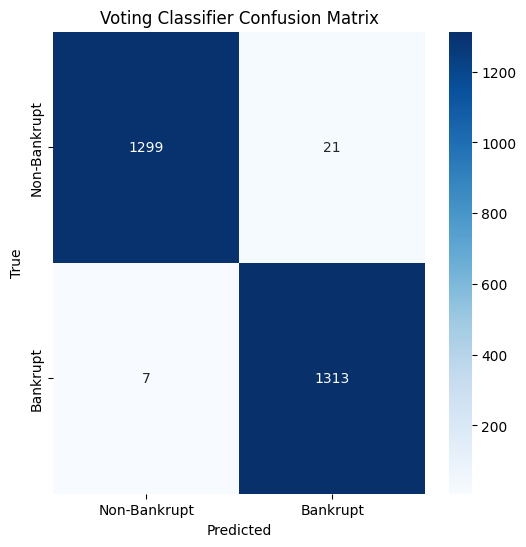

In [39]:
# Features and target
X = df.drop('Bankrupt?', axis=1)  # Features
y = df['Bankrupt?']  # Target (Bankrupt: 0 or 1)

# Handle missing values (in case it's not done yet)
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X[X > 1e10] = np.nan
X[X < -1e10] = np.nan

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_imputed, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Define models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Create a Voting Classifier to combine both models
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='hard')  # 'hard' voting means majority class is predicted

# Create a pipeline that includes SMOTE, imputation, scaling, and the ensemble model
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # Oversample the minority class
    ('scaler', StandardScaler()),      # Standardize features
    ('voting_model', voting_model)     # Use the voting model (ensemble)
])

# Train the pipeline with the training data
pipeline.fit(X_train, y_train)

# Make predictions with the trained pipeline
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optionally: Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.title('Voting Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

This is such a good model. I'm very sus. Let's test it out. 

Evaluating how the model works performance wise without SMOTE. Ie on real, non-synthetic data.

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.58      0.16      0.25        44

    accuracy                           0.97      1364
   macro avg       0.78      0.58      0.62      1364
weighted avg       0.96      0.97      0.96      1364


Confusion Matrix:
[[1315    5]
 [  37    7]]


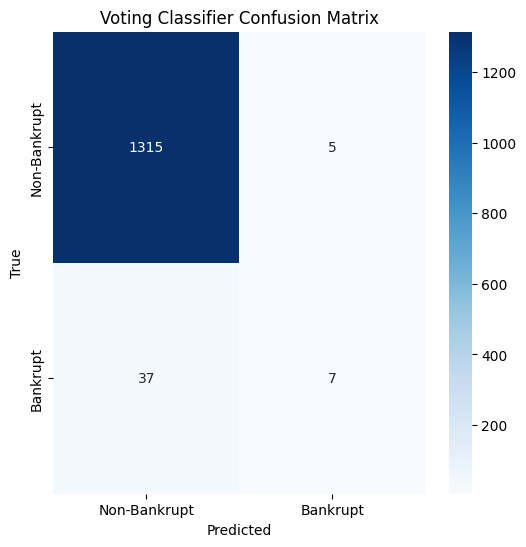

In [40]:
# Features and target
x = df.drop('Bankrupt?', axis=1)  # Features
y = df['Bankrupt?']  # Target (Bankrupt: 0 or 1)

# Handle missing values (in case it's not done yet)
x.replace([np.inf, -np.inf], np.nan, inplace=True)
x[x > 1e10] = np.nan
x[x < -1e10] = np.nan

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(x)

# Split the data into training and testing sets (without SMOTE)
x_train, x_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Define models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Create a Voting Classifier to combine both models
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='hard')  # 'hard' voting means majority class is predicted

# Create a pipeline that includes imputation, scaling, and the ensemble model
pipeline = Pipeline([
    ('scaler', StandardScaler()),      # Standardize features
    ('voting_model', voting_model)     # Use the voting model (ensemble)
])

# Train the pipeline with the training data
pipeline.fit(x_train, y_train)

# Make predictions with the trained pipeline
y_pred = pipeline.predict(x_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optionally: Plot confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Bankrupt', 'Bankrupt'], yticklabels=['Non-Bankrupt', 'Bankrupt'])
plt.title('Voting Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Let's include an ROC-AUC score. 

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

ROC-AUC Score: 0.9991


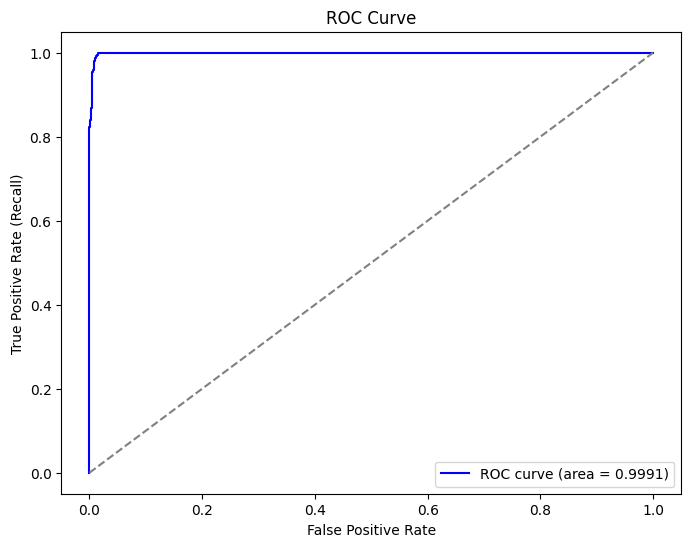

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1320
           1       0.98      1.00      0.99      1320

    accuracy                           0.99      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       0.99      0.99      0.99      2640


Confusion Matrix:
[[1295   25]
 [   2 1318]]


In [42]:
# Features and target
x = df.drop('Bankrupt?', axis=1)  # Features
y = df['Bankrupt?']  # Target (Bankrupt: 0 or 1)

# Handle missing values (in case it's not done yet)
x.replace([np.inf, -np.inf], np.nan, inplace=True)
x[x > 1e10] = np.nan
x[x < -1e10] = np.nan

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
x_imputed = imputer.fit_transform(x)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x_imputed, y)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42, stratify=y_res)

# Define models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Create a Voting Classifier to combine both models
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='soft')  # 'hard' voting means majority class is predicted

# Create a pipeline that includes SMOTE, imputation, scaling, and the ensemble model
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),  # Oversample the minority class
    ('scaler', StandardScaler()),      # Standardize features
    ('voting_model', voting_model)     # Use the voting model (ensemble)
])

# Train the pipeline with the training data
pipeline.fit(x_train, y_train)

# Make predictions with the trained pipeline
y_pred = pipeline.predict(x_test)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(x_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(x_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

check with validation data. 

Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1320
           1       0.97      1.00      0.98      1320

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640


Validation Confusion Matrix:
[[1280   40]
 [   4 1316]]
Validation ROC-AUC Score: 0.9980


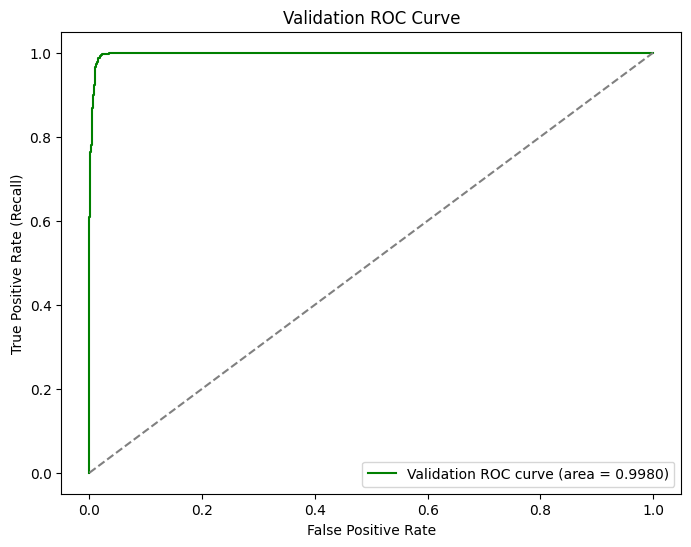

Test ROC-AUC Score: 0.9988


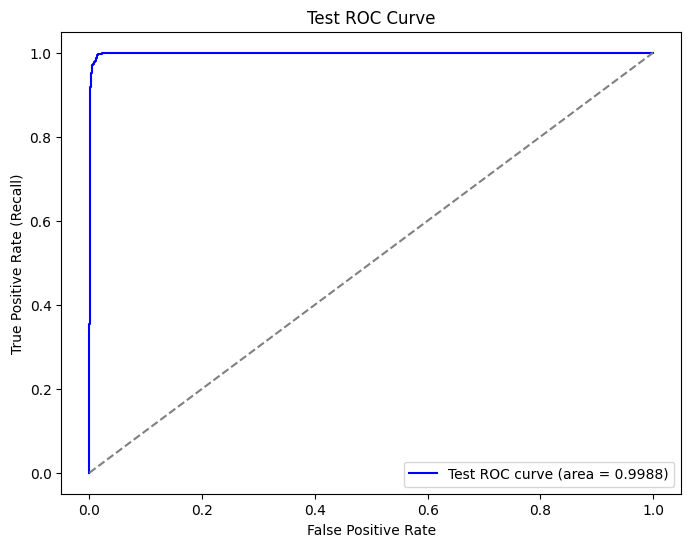

Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1320
           1       0.98      1.00      0.99      1320

    accuracy                           0.99      2640
   macro avg       0.99      0.99      0.99      2640
weighted avg       0.99      0.99      0.99      2640


Test Confusion Matrix:
[[1287   33]
 [   1 1319]]


In [43]:
# Features and target
x = df.drop('Bankrupt?', axis=1)  # Features
y = df['Bankrupt?']  # Target (Bankrupt: 0 or 1)

# Handle missing values (in case it's not done yet)
x.replace([np.inf, -np.inf], np.nan, inplace=True)
x[x > 1e10] = np.nan
x[x < -1e10] = np.nan

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
x_imputed = imputer.fit_transform(x)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x_imputed, y)

# Split the data into training, validation, and testing sets
x_temp, x_val, y_temp, y_val = train_test_split(
    x_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)  # Reserve 20% for validation

x_train, x_test, y_train, y_test = train_test_split(
    x_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)  # 60% training, 20% testing (since 0.25 of 80% = 20%)

# Define models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Create a Voting Classifier to combine both models
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('xgb', xgb_model)
], voting='soft')  # 'soft' voting allows probabilities to be used

# Create a pipeline that includes SMOTE, scaling, and the ensemble model
pipeline = Pipeline([
    ('scaler', StandardScaler()),      # Standardize features
    ('voting_model', voting_model)     # Use the voting model (ensemble)
])

# Train the pipeline with the training data
pipeline.fit(x_train, y_train)

# Evaluate on the validation set
y_val_pred = pipeline.predict(x_val)
y_val_proba = pipeline.predict_proba(x_val)[:, 1]

# Calculate metrics for validation data
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

print("\nValidation Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

# Calculate ROC-AUC for validation data
roc_auc_val = roc_auc_score(y_val, y_val_proba)
print(f"Validation ROC-AUC Score: {roc_auc_val:.4f}")

# Plot ROC Curve for validation data
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_val_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='g', label=f'Validation ROC curve (area = {roc_auc_val:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Validation ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test set
y_pred = pipeline.predict(x_test)
y_proba = pipeline.predict_proba(x_test)[:, 1]

# Calculate ROC-AUC score for the test data
roc_auc = roc_auc_score(y_test, y_proba)
print(f"Test ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='b', label=f'Test ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Test ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test set
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))